In [1]:
import get_data
import pandas as pd
import numpy as np
from pydob import database
import os
import matplotlib.pyplot as plt

In [7]:
test_data = get_data.get_high_level_trends_data(begin_year=2017,end_year=2018)

In [8]:
test_data

{'year_month_applicants':                job
 data_labels       
 2017-1        7781
 2017-2        7665
 2017-3        9828
 2017-4        8670
 2017-5       10338
 2017-6       10096
 2017-7        8857
 2017-8       10478
 2017-9        8622
 2017-10       8772
 2017-11       7831
 2017-12       6761
 2018-1        7195
 2018-2        6776
 2018-3        8480
 2018-4        8094
 2018-5        9098
 2018-6        8565
 2018-7        8165
 2018-8        9331
 2018-9        7218
 2018-10       9090
 2018-11       7918
 2018-12       7214, 'year_month_permits':              permit_si_no
 data_labels              
 2017-1              14337
 2017-2              13820
 2017-3              18654
 2017-4              15768
 2017-5              18027
 2017-6              18315
 2017-7              16012
 2017-8              18809
 2017-9              16216
 2017-10             16908
 2017-11             14725
 2017-12             13752
 2018-1              13367
 2018-2              11363
 

In [3]:
tabels_dict  =  get_data.get_high_level_trends_data(begin_year=2000,end_year=2018)

In [10]:
def get_issuance_rates_df(dataset_name=None,filter_year=2000):
    def get_issuance_rate(df):
        return df.approved.notnull().sum() / df.fully_paid.notnull().sum()
    col1 = 'approved'
    col2 = 'fully_paid'
    year_col = 'pre_filing_date_year'
    sql = f"""
           select {col1}, {col2},{year_col}
           from {dataset_name}
           where {year_col} >= {filter_year}
        """

    df = database.get_query_as_df(sql)

    return df.loc[
              :, [col1,col2, year_col]
        ].groupby(
              [year_col]
        ).apply(
                get_issuance_rate)
    

In [11]:
def get_issuance_num_df(dataset_name=None,filter_year=2000):
    
    col1 = 'approved'
    year_col = 'pre_filing_date_year'
    sql = f"""
           select {col1},{year_col}
           from {dataset_name}
           where {year_col} >= {filter_year}
        """

    df = database.get_query_as_df(sql)

    return df.loc[
              :, [col1, year_col]
        ].groupby(
              [year_col]
        ).count()
    

In [23]:
def get_issuance_rates_type_df(dataset_name=None,filter_year=2000):
    def get_issuance_rate(df):
        return df.approved.notnull().sum() / df.fully_paid.notnull().sum()
    col1 = 'approved'
    col2 = 'fully_paid'
    col3 = 'job_type'
    year_col = 'pre_filing_date_year'
    sql = f"""
           select {col1}, {col2},{col3},{year_col}
           from {dataset_name}
           where {year_col} >= {filter_year}
        """

    df = database.get_query_as_df(sql)

    return df.loc[
              :, [col1,col2, col3, year_col]
        ].groupby(
              [year_col,col3]
        ).apply(
                get_issuance_rate)

In [36]:
def get_complaints_type_df(dataset_name=None,filter_year=2000):
    col1 = 'complaint_number'
    col2 = 'complaint_category'
    year_col = 'date_entered_year'
    sql = f"""
           select {col1}, {col2},{year_col}
           from {dataset_name}
           where {year_col} >= {filter_year}
        """

    df = database.get_query_as_df(sql)

    return df.loc[
              :, [col1,col2, year_col]
        ].groupby(
              [year_col,col2]
        ).count()

In [37]:
year_category_table = get_complaints_type_df(dataset_name='complaints')

In [38]:
year_category_table=year_category_table.reset_index()\
                                       .sort_values(by = [
                                            'date_entered_year','complaint_number'], 
                                                    ascending  = False)\
                                       .set_index(['date_entered_year','complaint_category'])/1000

year_category_table_top3 = year_category_table.groupby(level='date_entered_year')\
                        .apply(lambda x: x.nlargest(3,columns = ['complaint_number']))\
                        .reset_index(level =0, drop = True)

# year_category_table_top3.loc[2000:2019].unstack()

to_plot = year_category_table_top3.loc[2006:2019].unstack()

to_plot.columns = to_plot.columns.droplevel()

In [46]:
# The Armor Falls
ntblue = os.environ.get("NEWTRAILS_BLUE")
ntblack = os.environ.get("NEWTRAILS_BLACK")

Text(0.5, 1.0, 'Top 3 Complaints Categories: 2006 - 2019')

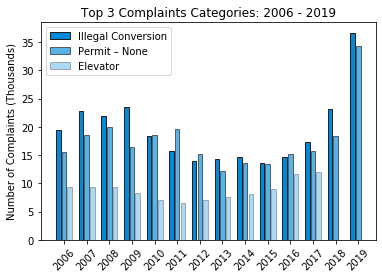

In [47]:
# setting legend labels
complaint_types=['Illegal Conversion','Permit – None','Elevator']

# x ticks labels
ix1 = to_plot.index.tolist()

# ticks
x1 = np.linspace(0,13,(2019-2006)+1)*4
x2 = np.linspace(0,13,(2019-2006)+1)*4+1
x3 = np.linspace(0,13,(2019-2006)+1)*4+2

# plotting
plt.bar(x1,to_plot['45'], width = 0.8, color=ntblue,label = complaint_types[0],edgecolor = ntblack, )
plt.bar(x2,to_plot['05'], width = 0.8, color=ntblue,alpha = 0.66, label = complaint_types[1],edgecolor = ntblack,)
plt.bar(x3,to_plot['63'], width = 0.8, color=ntblue,alpha = 0.33, label = complaint_types[2],edgecolor = ntblack,)

#label
plt.xticks(ticks=x2, labels=ix1,rotation=45)
lab = plt.ylabel("Number of Complaints (Thousands)")
lab = plt.xlabel(None)

# Legend
l = plt.legend()

# title
plt.title("Top 3 Complaints Categories: 2006 - 2019")
